#### SVM Classifier

In [2]:
##Import Required Libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns
import numpy as np
import time

In [3]:
## Importing Iris Data Set
Full_data= load_iris()
#print(Full_data)

## Seperating data and target values from dataset
Main_data = Full_data['data']
Class = Full_data['target']

## Converting to dataframes and assigning column names
data_df= pd.DataFrame(Main_data, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
class_df=pd.DataFrame(Class, columns=['Class'])

##Replacing Class values with actual category
setosa_df = class_df.replace(to_replace=[0], value='Setosa', regex=True)
versicolor_df = setosa_df.replace(to_replace=[1], value='versicolor', regex=True)
class_name_df = versicolor_df.replace(to_replace=[2], value='virginica', regex=True)
#print(class_name_df)

##Combining data Dataframe with class dataframe 
F1_df = pd.concat([data_df.reset_index(drop=True), class_df.reset_index(drop=True)], axis=1)        #Without class names
print(F1_df)
print('----------------------------------------------------------------------------------------')
F2_df = pd.concat([data_df.reset_index(drop=True), class_name_df.reset_index(drop=True)], axis=1)     #With class names
print(F2_df)

##Using iloc
data_df= F1_df.iloc[:, :-1].values
#print(data_df)
class_df = F1_df.iloc[:, 4].values
#print(class_df)

     sepal length  sepal width  petal length  petal width  Class
0             5.1          3.5           1.4          0.2      0
1             4.9          3.0           1.4          0.2      0
2             4.7          3.2           1.3          0.2      0
3             4.6          3.1           1.5          0.2      0
4             5.0          3.6           1.4          0.2      0
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      2
146           6.3          2.5           5.0          1.9      2
147           6.5          3.0           5.2          2.0      2
148           6.2          3.4           5.4          2.3      2
149           5.9          3.0           5.1          1.8      2

[150 rows x 5 columns]
----------------------------------------------------------------------------------------
     sepal length  sepal width  petal length  petal width      Class
0             5.1          3.5        

In [4]:
## Divide the data int0 training and testing set
full_train_data, full_test_data, full_train_class, full_test_class = train_test_split(data_df, class_df, test_size=0.2, random_state=42)
print('-------------------------------------------------------------------------------------------------------')
print('Training data Count: ', len(full_train_data))
print('Testing data Count: ', len(full_test_data))
print('Training Target Value Count: ', len(full_train_class))
print('Testing Target Value Count', len(full_test_class))
print('--------------------------------------------------------------------------------------------------------')

-------------------------------------------------------------------------------------------------------
Training data Count:  120
Testing data Count:  30
Training Target Value Count:  120
Testing Target Value Count 30
--------------------------------------------------------------------------------------------------------


In [5]:
##Applying 10 Cross Fold Validation on training data

Acc_list=[]                                     #List to store accuracy for different C values
Reg= [0.1, 0.5, 1, 2, 5, 10, 20, 50]            # Given C Values (Reg = Regularization Parameter)
for r in range(len(Reg)):
    SVC_classifier = svm.SVC(kernel='linear', C=Reg[r], random_state=42)
    Values= cross_val_score(SVC_classifier, full_train_data, full_train_class, cv=10)
    print('For C= %.1f' %Reg[r])
    print('\n')
    print('Score Values are:\n ', Values)
    print('\n')
    mean_accuracy=Values.mean()*100
    print("Mean Accuracy is: ", mean_accuracy, '%')
    print('---------------------------------------------------------------------------')
    
    Acc_list.append(mean_accuracy)

print('Accuracy List for different C Values: ', Acc_list)

For C= 0.1


Score Values are:
  [1.         1.         1.         1.         0.83333333 0.83333333
 1.         1.         1.         0.91666667]


Mean Accuracy is:  95.83333333333334 %
---------------------------------------------------------------------------
For C= 0.5


Score Values are:
  [1.         1.         0.91666667 1.         0.91666667 0.83333333
 1.         1.         1.         0.91666667]


Mean Accuracy is:  95.83333333333333 %
---------------------------------------------------------------------------
For C= 1.0


Score Values are:
  [1.         1.         0.91666667 1.         0.91666667 0.83333333
 1.         1.         1.         0.91666667]


Mean Accuracy is:  95.83333333333333 %
---------------------------------------------------------------------------
For C= 2.0


Score Values are:
  [1.         1.         0.91666667 1.         0.83333333 0.83333333
 1.         1.         1.         1.        ]


Mean Accuracy is:  95.83333333333334 %
------------------------

#### Highest Accuracy of 95.83333333333334 %  is obtained for C = [0.1, 2, 5], which is one decimal up by accuracy of 93.33333333333333 % obtained for C = [0.5, 1].

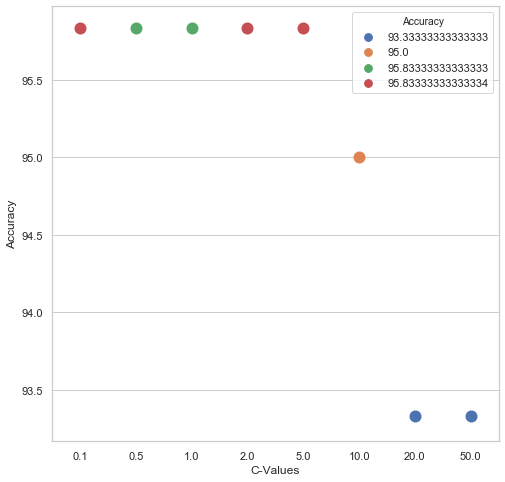

In [6]:
#Plotting C value vs Accuracies
C_df = pd.DataFrame(Reg, columns=['C-Values'])
Acc_df = pd.DataFrame(Acc_list, columns=['Accuracy'])
C_Acc_df = pd.concat([C_df.reset_index(drop=True),Acc_df.reset_index(drop=True)], axis=1)
#print(C_Acc_df)

##Seaborn Plot
sns.set(style='whitegrid')
fig, axes = plt.subplots(figsize=(8,8))
sns.swarmplot('C-Values', 'Accuracy', data=C_Acc_df, hue='Accuracy', size=12)
plt.show()

In [7]:
##Testing classifier performance on Test Data for C values which provided maximum accuracy.

C_values = [0.1, 2, 5]
for c in range(len(C_values)):
    start = time.perf_counter()
    classifier = svm.SVC(C = C_values[c], kernel='linear', random_state=42)
    classifier.fit(full_train_data, full_train_class)
    test_prediction = classifier.predict(full_test_data)
    mean_accuracy = accuracy_score(test_prediction, full_test_class)*100
    end = (time.perf_counter() - start)
    cm = confusion_matrix(full_test_class, test_prediction)
    print('For C = ', C_values[c])
    print('\n')
    print('Confusion Matrix:\n', cm)
    print('\n')
    cr = classification_report(full_test_class, test_prediction, target_names=['setosa', 'versicolor', 'virginica'])
    print('Classification Report:\n', cr)
    print('\n')
    print("Mean Accuracy is: ", mean_accuracy, '%')
    print('\n')
    print('Time: ', end)
    print('---------------------------------------------------------------------------')


For C =  0.1


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Mean Accuracy is:  100.0 %


Time:  0.001670699999522185
---------------------------------------------------------------------------
For C =  2


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1

#### Following are the observations:

(1) On Testing C parameter values = [0.1, 2, 5] with test data, **C = 0.1 and C = 2 results in 100% accuracy** (appears crystal clear through classification report), however C = 5 provided a mean accuracy of 96.66666666666667 %.

(2) Now we have 2 values of C parameter providing maximum accuracy. Therefore in order to choose one, following things need to kept in mind:

- C or Regularization parameter is mainly concerned about the hyperplane that correctly seperates all the classes of the dataset.


- **Lower value of C results in large margin separating hyperplane for classification between classes, even if the classifier is misclassifiying some data points. Reason being hyperplane neglects the outliers(because of which misclassification takes place) with low value of C.**


- **Higher value of C results in small margin seperating hyperplane and if the margin is too small it could lead to overfitting and can negatively impact generalization properties of classifier.**

According to this phenomenon, **best value would be C =2** which results in a small margin hyperplane as compared to C =0.1, but with C =0.1 classifier will do misclassification as it will not take outliers into account whereas at C =2 we get same accuracy with 0 misclassification error (refer to confusion matrix). 

(P.S: In general, to minimize the misclassification error, we can perform data preprocessing on the main dataset to remove outliers by using techniques such as Interquartile range method and many others.)
